In [66]:
import pandas as pd
import ast

In [76]:
dataset_df = pd.read_csv('../../data/scraped_raw_dataset.csv')
cleaned_dataset_df = pd.read_csv('../../data/cleaned_scraped_raw_dataset.csv')

In [78]:
cleaned_dataset_df[cleaned_dataset_df.duplicated(subset=['id'])]

,Unnamed: 0,id,name,is_fork,commits,branches,releases,forks,main_language,default_branch,...,is_disabled,is_locked,languages,labels,topics,programming_language,file_commit_gram_scenarios,merge_scenarios,cherry_pick_scenarios,error
2,2,3983495,online-ml/river,False,3875,8,15,526,Python,main,...,False,False,"{""Python"":2137050,""Cython"":39786,""Rust"":8819,""...",bug;code quality;dependencies;discussion;docum...,concept-drift;data-science;incremental-learnin...,python,"[{'file': 'river/anomaly/test_ilof.py', 'branc...",[{'merge_commit_hash': '1addafe2ef4418570039f7...,[],NaN
5,5,3986779,pymedphys/pymedphys,False,8882,50,63,70,Python,main,...,False,False,"{""Python"":1352520,""JavaScript"":16935,""TeX"":142...",app;bug;bus-factor;ci / cd;dependencies;deprec...,dicom;medical-physics;radiation-oncology;radia...,python,"[{'file': 'pymedphys/_version.py', 'branch': '...",[{'merge_commit_hash': 'd68b28b1773df39495cead...,[],NaN
7,7,3927570,jazzband/django-taggit,False,1072,12,0,617,Python,master,...,False,False,"{""Python"":189174,""HTML"":124}",bug;docs;enhancement;good first issue;hacktobe...,NaN,python,"[{'file': 'tests/tests.py', 'branch': 'origin/...",[{'merge_commit_hash': '7af1e7415225ef00c801a7...,[],NaN
10,10,3965631,scrapinghub/dateparser,False,1517,47,29,463,Python,master,...,False,False,"{""Python"":1659332,""Shell"":260}",breaking-change;cleanup;dependencies;discussio...,hacktoberfest,python,"[{'file': 'dateparser/parser.py', 'branch': 'm...",[{'merge_commit_hash': '544ea39656dc53a97bb24d...,[],NaN
13,13,3985700,neuralet/smart-social-distancing,False,630,8,7,30,Python,master,...,False,False,"{""Python"":828885,""Dockerfile"":28394,""HTML"":215...",bug;dependencies;documentation;duplicate;enhan...,NaN,python,"[{'file': 'api/routers/cameras.py', 'branch': ...",[{'merge_commit_hash': 'f7c7b47b10c14f02f02262...,[],NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12242,12242,94482262,kipoi/models,False,1044,16,49,57,Python,master,...,False,False,"{""Python"":627308,""Jupyter Notebook"":531552,""Sh...",bug;contribution welcome;duplicate;enhancement...,NaN,python,"[{'file': 'MMSplice/dataloader.py', 'branch': ...",[{'merge_commit_hash': '06bfe84758b996d06f7f60...,[],NaN
12244,12244,95068326,ddlBoJack/SLAM-LLM,False,593,22,0,22,Python,main,...,False,False,"{""Python"":851540,""Shell"":7124,""Dockerfile"":1337}",bug;documentation;duplicate;enhancement;good f...,NaN,python,[{'file': 'src/llama_recipes/models/slam_model...,[{'merge_commit_hash': 'f32b8a20b67360477837cf...,[],NaN
12248,12248,88298373,zhayujie/bot-on-anything,False,237,8,9,717,Python,master,...,False,False,"{""Python"":135539,""CSS"":12567,""JavaScript"":8464...",bug;documentation;duplicate;enhancement;good f...,chatgpt;gmail;qq;slack;telegram;web;wechat;wec...,python,"[{'file': 'app.py', 'branch': 'origin/feat-ter...",[{'merge_commit_hash': '1e92ee1eda8ccd775779bf...,[],NaN
12250,12250,94532436,Azure-Samples/azure-search-openai-demo,False,465,60,32,3332,Python,main,...,False,False,"{""Python"":443242,""Bicep"":102231,""TypeScript"":1...",auth;azd;bug;dependencies;documentation;duplic...,azd-templates;azure;azurecognitivesearch;azure...,python,[{'file': 'scripts/prepdocslib/textsplitter.py...,[{'merge_commit_hash': 'e3dc08714d976fe1f112b5...,[],NaN


If we remove all duplicates we would get back to the original dataset exactly.

In [59]:
dataset_df.programming_language.value_counts()

programming_language
python    4966
java      2470
kotlin     496
Name: count, dtype: int64

We know that we have some duplicates, lets see if there is a pattern, such as errors.

In [68]:
duplicates = dataset_df[dataset_df.duplicated(subset=['id'])]

In [77]:
dataset_df.error.isna().value_counts()

error
True     7848
False     168
Name: count, dtype: int64

In [75]:
dataset_df[~dataset_df.error.isna()].error.apply(lambda err: err.split('write error:')[-1])

121      No space left on device\nfatal: fetch-pack: i...
122      No space left on device\nfatal: fetch-pack: i...
252      No space left on device\nfatal: fetch-pack: i...
253      No space left on device\nfatal: fetch-pack: i...
311      No space left on device\nfatal: fetch-pack: i...
                              ...                        
7873     No space left on device\nfatal: fetch-pack: i...
7952     No space left on device\nfatal: fetch-pack: i...
7953     No space left on device\nfatal: fetch-pack: i...
7963     No space left on device\nfatal: fetch-pack: i...
7964     No space left on device\nfatal: fetch-pack: i...
Name: error, Length: 168, dtype: object

In [24]:
duplicates.error.isna().value_counts()

error
False    84
Name: count, dtype: int64

All of the duplicates are erroneous samples.

In [25]:
duplicates.error.apply(lambda err: err.split('write error:')[-1])

122      No space left on device\nfatal: fetch-pack: i...
253      No space left on device\nfatal: fetch-pack: i...
312      No space left on device\nfatal: fetch-pack: i...
325     Traceback (most recent call last):\n  File "/s...
336      No space left on device\nfatal: fetch-pack: i...
                              ...                        
7798     No space left on device\nfatal: fetch-pack: i...
7856    Traceback (most recent call last):\n  File "/s...
7873     No space left on device\nfatal: fetch-pack: i...
7953     No space left on device\nfatal: fetch-pack: i...
7964     No space left on device\nfatal: fetch-pack: i...
Name: error, Length: 84, dtype: object

We note that by far the most common issue is that the repository did not fit into the file system. Thus we should increase the file system size if we ever re-compute the dataset. Let's drop the duplicates.

In [26]:
dataset_df = dataset_df.drop_duplicates(subset=['id'])

In [27]:
dataset_df['file_commit_gram_scenarios'] = dataset_df['file_commit_gram_scenarios'].apply(lambda row: ast.literal_eval(row) if row not in ['None', 'none', 'nan', 'NaN'] and not pd.isna(row) else [])
dataset_df['merge_scenarios'] = dataset_df['merge_scenarios'].apply(lambda row: ast.literal_eval(row) if row not in ['None', 'none', 'nan', 'NaN'] and not pd.isna(row) else [])
dataset_df['cherry_pick_scenarios'] = dataset_df['cherry_pick_scenarios'].apply(lambda row: ast.literal_eval(row) if row not in ['None', 'none', 'nan', 'NaN'] and not pd.isna(row) else [])

In [28]:
dataset_df['n_file_commit_gram_scenarios'] = dataset_df['file_commit_gram_scenarios'].apply(lambda row: len(row))
dataset_df['n_merge_scenarios'] = dataset_df['merge_scenarios'].apply(lambda row: len(row))
dataset_df['n_cherry_pick_scenarios'] = dataset_df['cherry_pick_scenarios'].apply(lambda row: len(row))

## Python

In [29]:
python_subset = dataset_df[dataset_df['programming_language'] == 'python']
python_subset['n_file_commit_gram_scenarios'].sum()

154059

In [30]:
python_subset['n_file_commit_gram_scenarios'].median()

9.0

In [31]:
python_subset['n_merge_scenarios'].sum()

360254

In [32]:
python_subset['n_merge_scenarios'].median()

28.0

In [33]:
python_subset['n_cherry_pick_scenarios'].sum()

51490

In [34]:
python_subset['n_cherry_pick_scenarios'].describe()

count    4966.000000
mean       10.368506
std       104.544544
min         0.000000
25%         0.000000
50%         0.000000
75%         3.000000
max      5904.000000
Name: n_cherry_pick_scenarios, dtype: float64

In [35]:
len(python_subset)

4966

In [36]:
# Compute median file-commit gram length
python_subset['file_commit_gram_scenarios'].apply(lambda sample: (sum([scenario['times_seen_consecutively'] for scenario in sample])/len(sample) if len(sample) > 0 else 0) if sample is not None else 0).median()

3.5

<Axes: title={'center': 'Merge Scenarios Per Repository - Python'}>

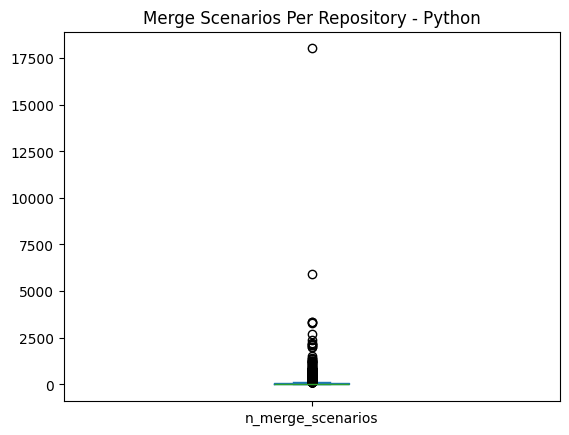

In [57]:
python_subset['n_merge_scenarios'].plot(kind='box', title='Merge Scenarios Per Repository - Python')

## Java

In [38]:
java_subset = dataset_df[dataset_df['programming_language'] == 'java']
java_subset['n_file_commit_gram_scenarios'].sum()

125335

In [39]:
java_subset['n_merge_scenarios'].sum()

186826

In [40]:
java_subset['n_cherry_pick_scenarios'].sum()

102940

In [41]:
# Compute median file-commit gram length
java_subset['file_commit_gram_scenarios'].apply(lambda sample: (sum([scenario['times_seen_consecutively'] for scenario in sample])/len(sample) if len(sample) > 0 else 0) if sample is not None else 0).median()

3.2857142857142856

In [42]:
len(java_subset)

2470

<Axes: title={'center': 'File-Commit Gram Scenarios Per Repository - Java'}>

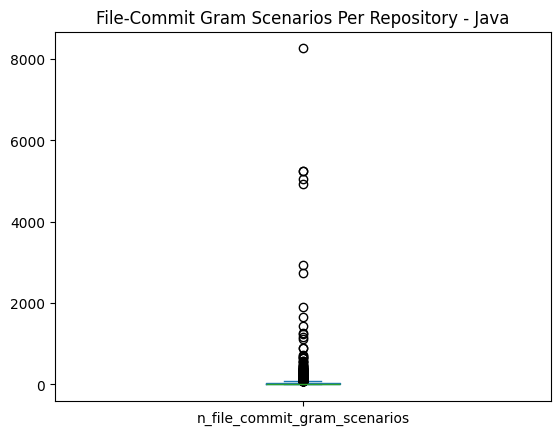

In [54]:
java_subset['n_file_commit_gram_scenarios'].plot(kind='box', title='File-Commit Gram Scenarios Per Repository - Java')

## Kotlin

In [44]:
kotlin_subset = dataset_df[dataset_df['programming_language'] == 'kotlin']
kotlin_subset['n_file_commit_gram_scenarios'].sum()

16791

In [45]:
kotlin_subset['n_merge_scenarios'].sum()

32163

In [46]:
kotlin_subset['n_cherry_pick_scenarios'].sum()

8292

In [47]:
# Compute median file-commit gram length
kotlin_subset['file_commit_gram_scenarios'].apply(lambda sample: (sum([scenario['times_seen_consecutively'] for scenario in sample])/len(sample) if len(sample) > 0 else 0) if sample is not None else 0).median()

3.372685185185185

In [48]:
len(kotlin_subset)

496

<Axes: title={'center': 'File-Commit Gram Scenarios Per Repository - Kotlin'}>

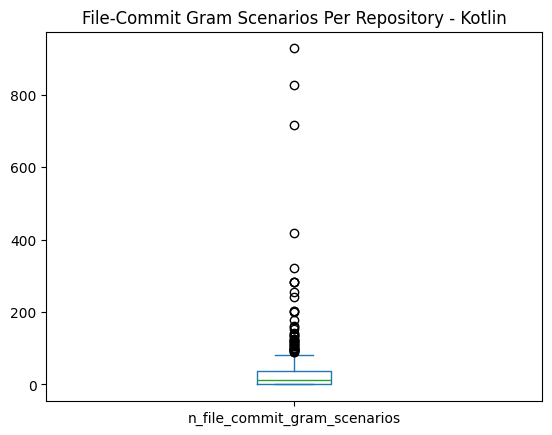

In [52]:
kotlin_subset['n_file_commit_gram_scenarios'].plot(kind='box', title='File-Commit Gram Scenarios Per Repository - Kotlin')

## Errors

In [50]:
dataset_df[~dataset_df.error.isna()].programming_language.value_counts()

programming_language
python    52
java      26
kotlin     6
Name: count, dtype: int64

# Do cherry-pick scenarios with more than 1 parent exist?

In [60]:
dataset_df['cherry_pick_scenarios']

0                                                      []
1                                                      []
2                                                      []
3                                                      []
4       [{'cherry_pick_commit': 'a5f8d3dc5287fb522ba8d...
                              ...                        
8011    [{'cherry_pick_commit': 'ead5cbb64bd7622b1750f...
8012    [{'cherry_pick_commit': '07e6ada4bc4f0f67c2469...
8013    [{'cherry_pick_commit': 'a5273cb7589fb17a6429b...
8014    [{'cherry_pick_commit': 'c32461276d2353b41601d...
8015    [{'cherry_pick_commit': 'c9b17cca0711a82510033...
Name: cherry_pick_scenarios, Length: 7932, dtype: object

In [65]:
found_one = False
for _, repo in dataset_df.iterrows():
    if found_one:
        break
    for cherry_pick_scenario in repo['cherry_pick_scenarios']:
        if len(cherry_pick_scenario['parents']) > 1:
            print(f'{repo["name"]}: {cherry_pick_scenario}')
            found_one = True

aws/aws-toolkit-jetbrains: {'cherry_pick_commit': '222916ef953ef2c4f906bc4c09b02218bb9209bb', 'cherry_commit': 'c7dbe4a1aef15e99d9c30636ff9ceb3296f15100', 'parents': ['3c568921f712f06bb8222e3f8acd4d16ce7663f9', '7ab79cc9e6ca7b9fd0ac614bb29dfd48e7e01874']}
